In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the dataset
df= pd.read_csv('employee_churn_data.csv')

In [ ]:
# 1. Exploratory Data Analysis (EDA)
# 1.1. Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [ ]:
# 1.2. Dataset dimensions
df.shape

(9540, 10)

In [ ]:
# 1.3. Attribute names
df.columns

Index(['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left'],
      dtype='object')

In [ ]:
# 1.4. Data type
df.dtypes

,0
department,object
promoted,int64
review,float64
projects,int64
salary,object
tenure,float64
satisfaction,float64
bonus,int64
avg_hrs_month,float64
left,object


In [ ]:
# 1.5 Head of dataset
df.head(10)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
5,IT,0,0.683206,2,medium,5.0,0.565252,1,178.841879,no
6,admin,0,0.620158,4,high,5.0,0.686951,0,181.142956,no
7,support,0,0.499567,4,medium,7.0,0.720451,1,184.977538,no
8,sales,0,0.652818,4,low,6.0,0.678696,0,183.655790,no
9,sales,0,0.642031,3,medium,6.0,0.623365,0,181.851000,no


In [ ]:
# 1. Data Cleaning
# 2.1. Verifying null values
df.isna().sum()

,0
department,0
promoted,0
review,0
projects,0
salary,0
tenure,0
satisfaction,0
bonus,0
avg_hrs_month,0
left,0


In [ ]:
# 2.2. Checking for duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9535,False
9536,False
9537,False
9538,False


In [ ]:
# 3. Enhancing dataset readability
# 3.1 Capitalize column names
df.columns = [col.capitalize() for col in df.columns]

In [ ]:
# 3.2 Convert 'Satisfaction' to a percentage and round it to two numbers.
df['Satisfaction'] = (df['Satisfaction'] * 100).round(2)


In [ ]:
# 3.3 Round 'Avg_hrs_month' to integers
df['Avg_hrs_month'] = df['Avg_hrs_month'].round().astype(int)

In [ ]:
# 3.4 Convert 'Tenure' to integer
df['Tenure'] = df['Tenure'].astype(int)

In [ ]:
# 3.5 Round "Review" to two numbers.
df['Review'] = df['Review'].round(2)

In [ ]:
df.head(10)

,Department,Promoted,Review,Projects,Salary,Tenure,Satisfaction,Bonus,Avg_hrs_month,Left
0,operations,0,0.58,3,low,5,62.68,0,181,no
1,operations,0,0.75,3,medium,6,44.37,0,183,no
2,support,0,0.72,3,medium,6,44.68,0,184,no
3,logistics,0,0.68,4,high,8,44.01,0,189,no
4,sales,0,0.68,3,high,5,57.76,1,180,no
5,IT,0,0.68,2,medium,5,56.53,1,179,no
6,admin,0,0.62,4,high,5,68.70,0,181,no
7,support,0,0.50,4,medium,7,72.05,1,185,no
8,sales,0,0.65,4,low,6,67.87,0,184,no
9,sales,0,0.64,3,medium,6,62.34,0,182,no


In [ ]:
print("Statistical Summary:" )
df.describe()

Statistical Summary:


,Promoted,Review,Projects,Tenure,Satisfaction,Bonus,Avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651843,3.274843,6.556184,50.464427,0.212055,184.661740
std,0.171403,0.085318,0.579136,1.415432,15.855491,0.408785,4.159235
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.000000
25%,0.000000,0.590000,3.000000,5.000000,38.680000,0.000000,181.000000
50%,0.000000,0.650000,3.000000,7.000000,50.080000,0.000000,185.000000
75%,0.000000,0.710000,4.000000,8.000000,62.260000,0.000000,188.000000
max,1.000000,1.000000,5.000000,12.000000,100.000000,1.000000,201.000000


In [ ]:
for i in df.select_dtypes('number'):
    print(df[i].value_counts())
    print("-"*10)
for i in df.select_dtypes('object'):
    print(df[i].value_counts())
    print("-"*10)

Promoted
0    9251
1     289
Name: count, dtype: int64
----------
Review
0.64    465
0.63    462
0.65    460
0.60    441
0.62    433
0.67    422
0.66    411
0.61    399
0.68    386
0.58    362
0.71    355
0.69    353
0.59    346
0.70    342
0.57    321
0.73    285
0.56    268
0.72    262
0.74    237
0.55    233
0.75    223
0.54    191
0.76    190
0.77    170
0.53    157
0.78    152
0.52    126
0.79    117
0.51    109
0.80    103
0.81     90
0.50     85
0.82     83
0.49     68
0.83     58
0.48     49
0.84     44
0.86     37
0.85     36
0.46     35
0.47     33
0.87     27
0.45     21
0.88     16
0.44     12
0.41     11
0.43     10
0.89     10
0.90      8
0.42      6
0.92      4
0.91      4
0.39      3
0.40      3
0.99      1
1.00      1
0.35      1
0.31      1
0.37      1
0.33      1
Name: count, dtype: int64
----------
Projects
3    5833
4    3058
2     578
5      71
Name: count, dtype: int64
----------
Tenure
6     2313
7     2209
8     1888
5     1823
9      578
4      518
10     127


<ipython-input-40-6dbf700ade20>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Department', palette='viridis',


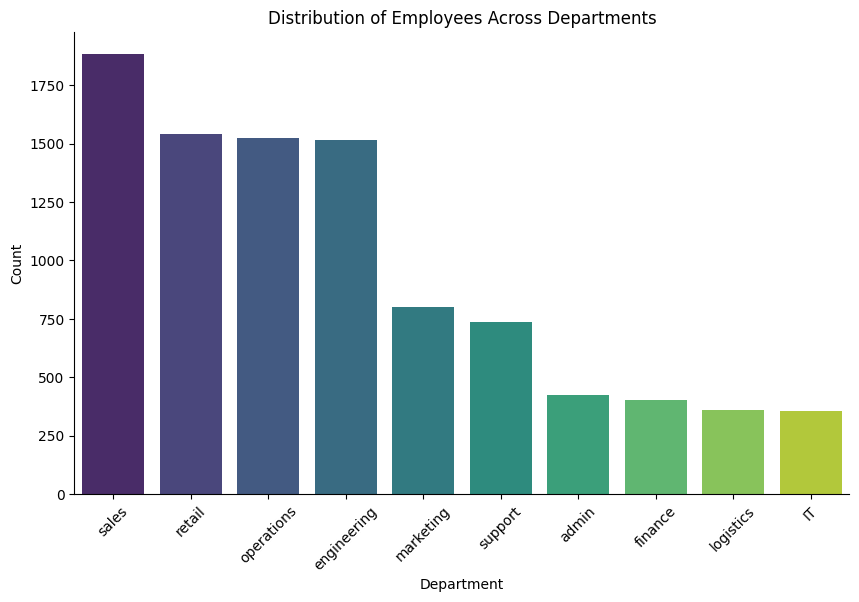

In [ ]:
# 5. Data Visualization
# Bar Plot: Distribution across departments
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', palette='viridis',
order=df['Department'].value_counts().index)
plt.title('Distribution of Employees Across Departments')
plt.xlabel('Department')
plt.ylabel('Count')
# Remove right and upper borders (spines)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.show()

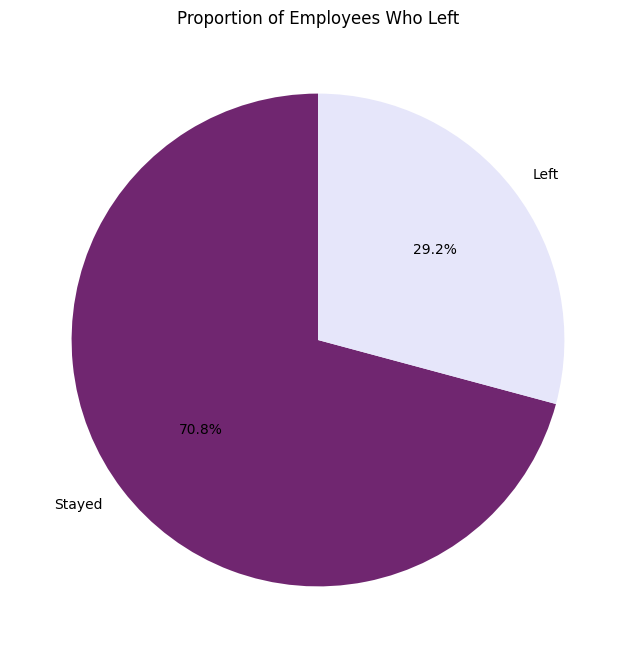

In [ ]:
# Pie Chart: Proportion of employees who left
plt.figure(figsize=(8, 8))
df['Left'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#702670', 'lavender'], labels=['Stayed', 'Left'])
plt.title('Proportion of Employees Who Left')
plt.ylabel('')
plt.show()

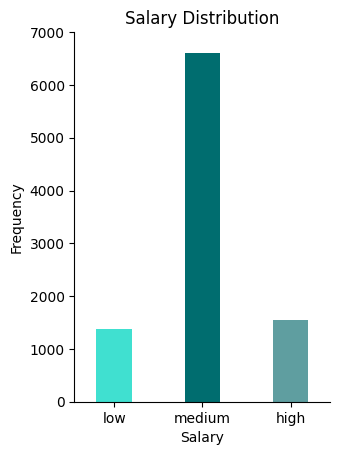

In [ ]:
#  Bar Plo:Salary Distribution
salary_counts = df["Salary"].value_counts().loc[['low', 'medium', 'high']]

# Plot the bar chart
ax = salary_counts.plot(kind='bar', color=['#40E0D0', '#006D6F', '#5F9EA0'], width=0.4)
plt.title('Salary Distribution') # Add labels and title
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
# Set Y-axis limits from 0 to 7000
plt.ylim(0, 7000)
# Set Y-axis ticks at intervals of 1000
plt.yticks(range(0, 7001, 1000))

# Remove right and upper borders (spines)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# Adjust the spacing between the x-axis labels
plt.subplots_adjust(left=0.2, right=0.6)

# Show the plot
plt.show()

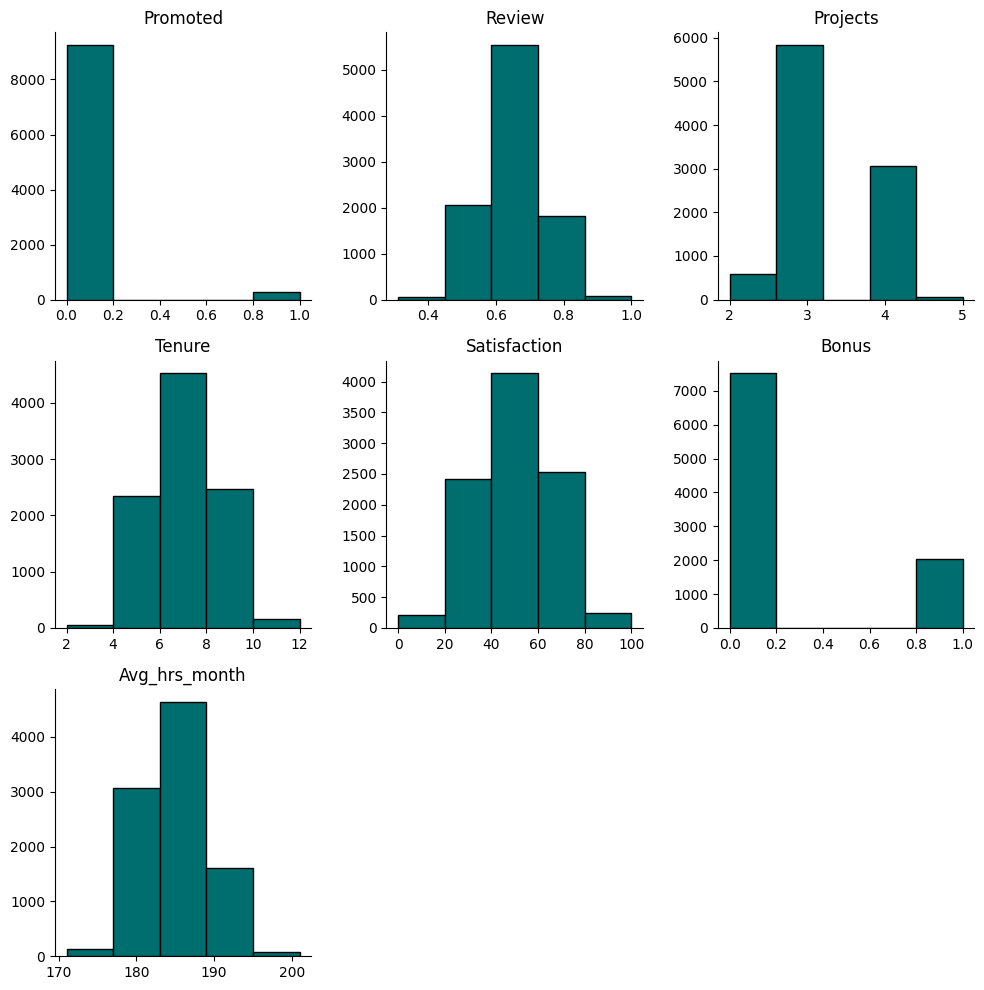

In [ ]:
#histogram for features
axes = df.hist(bins=5,figsize=(10,10), color='#006D6F', grid=False, edgecolor='black')

# Loop through each subplot and remove right and upper spines
for ax in axes.flatten():  # Flatten to loop through subplots
    ax.spines['right'].set_visible(False)  # Remove right border
    ax.spines['top'].set_visible(False)    # Remove upper border
plt.tight_layout()
plt.show()

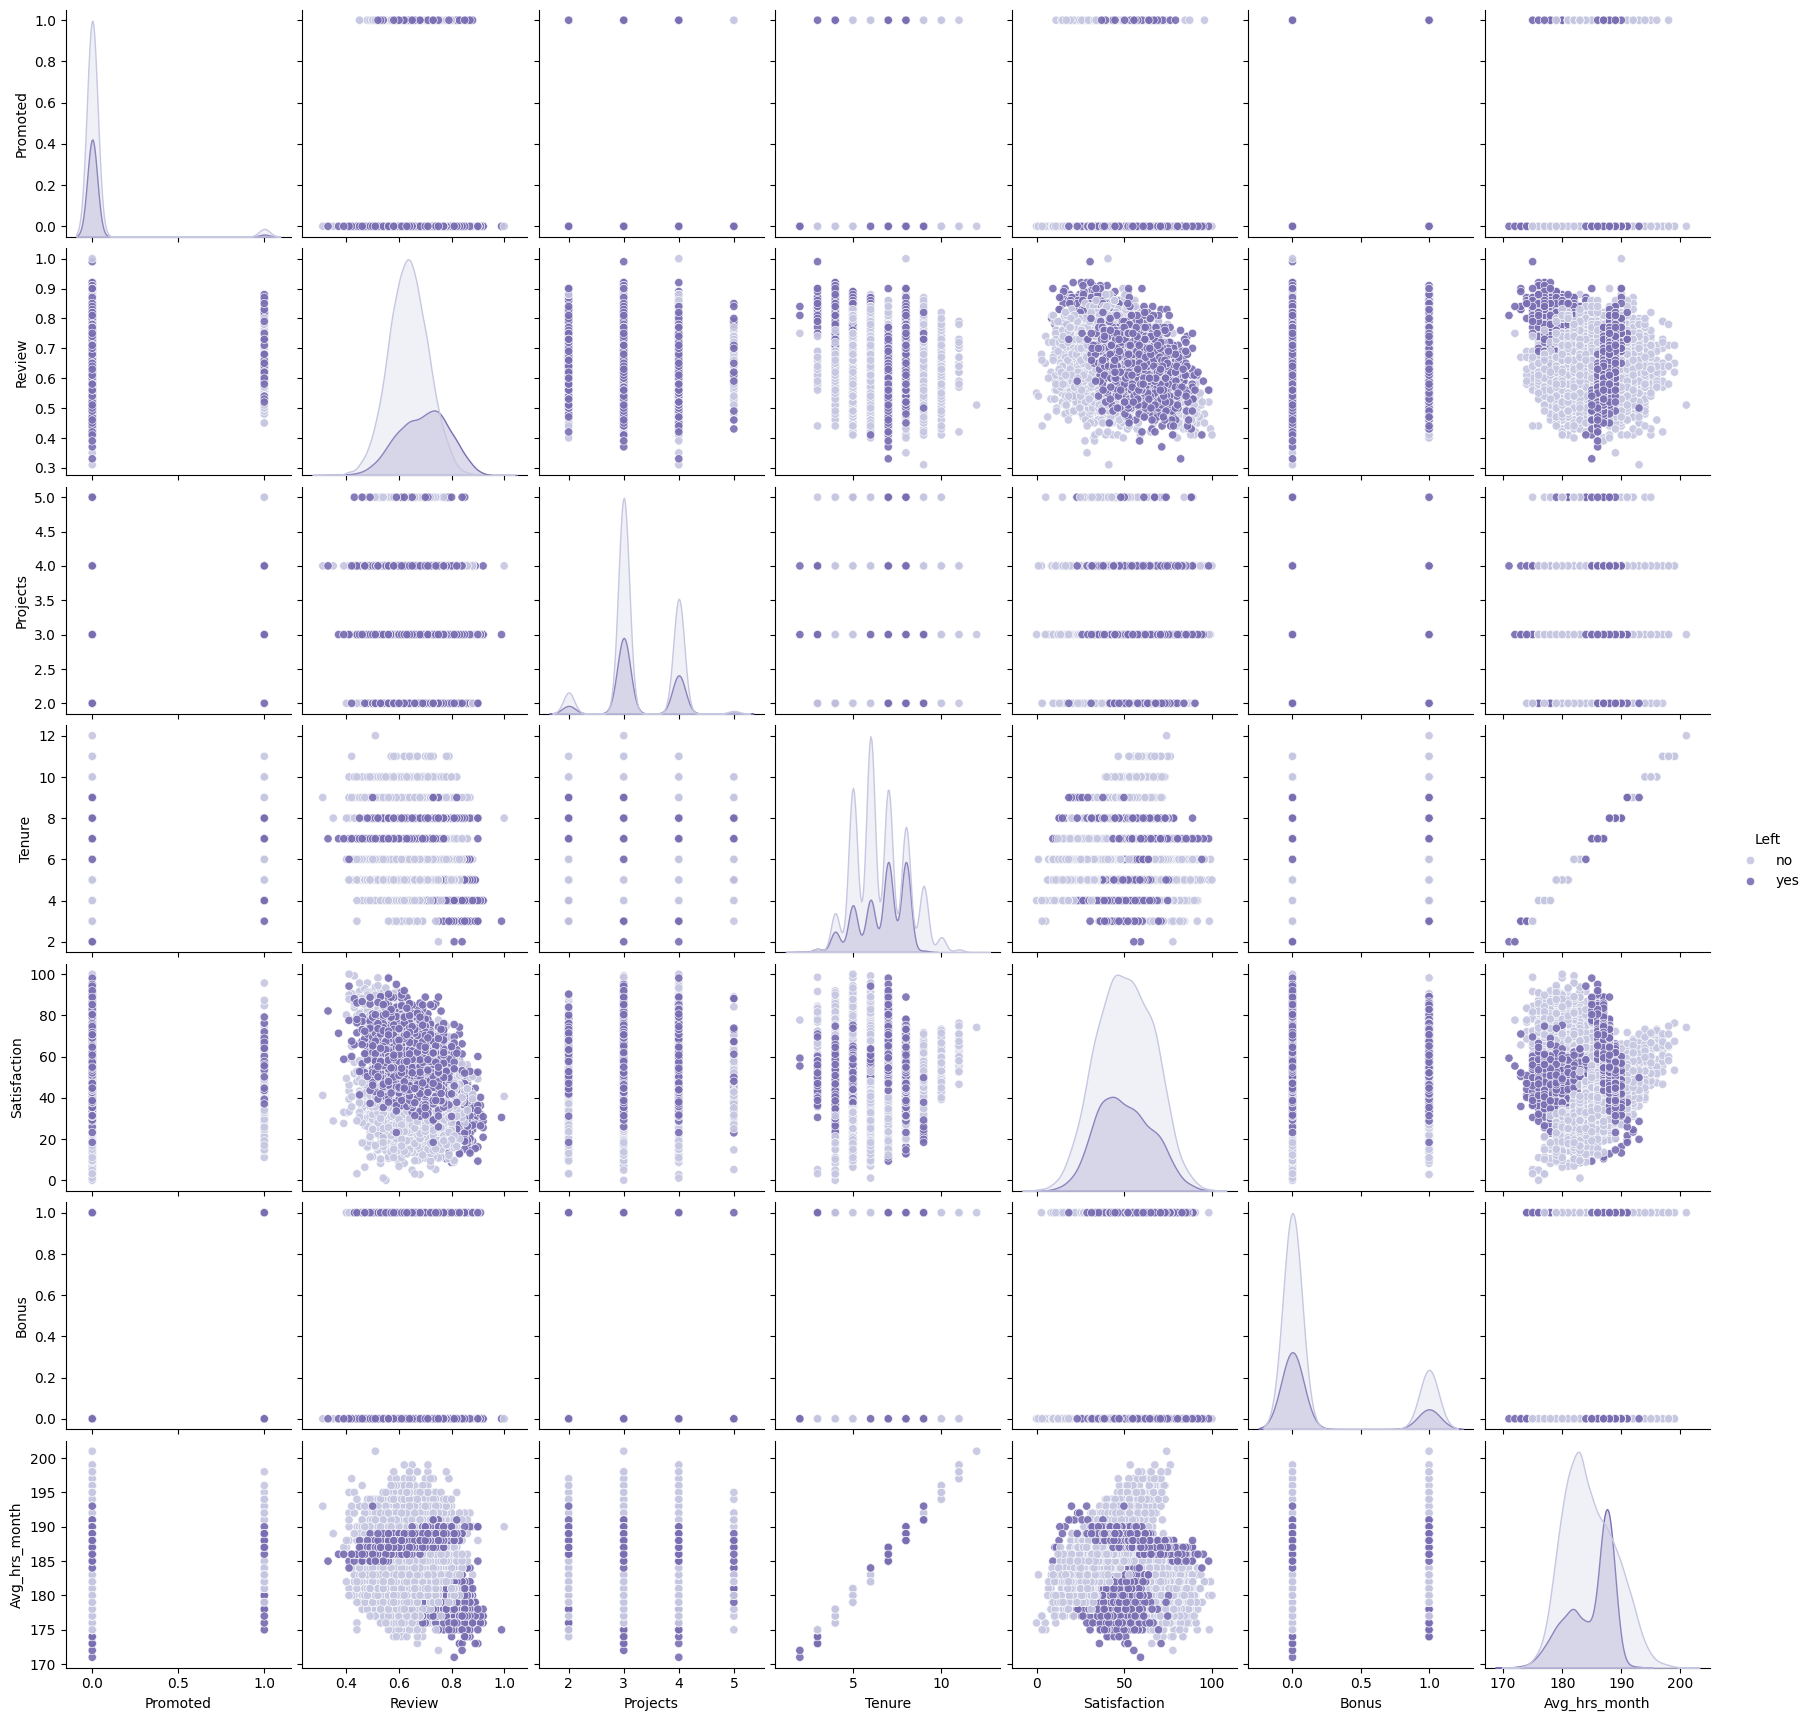

In [ ]:
# Pairplot: Pairwise attribute relationships
sns.pairplot(df, hue='Left', palette='Purples', diag_kind='kde', plot_kws={'alpha': 0.9})
plt.show()

<ipython-input-141-7b177bf8f676>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


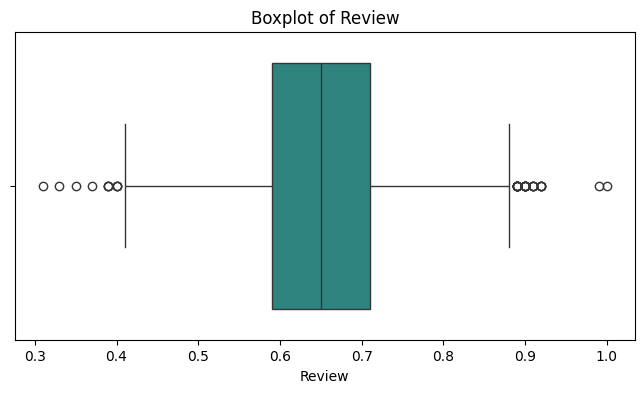

<ipython-input-141-7b177bf8f676>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


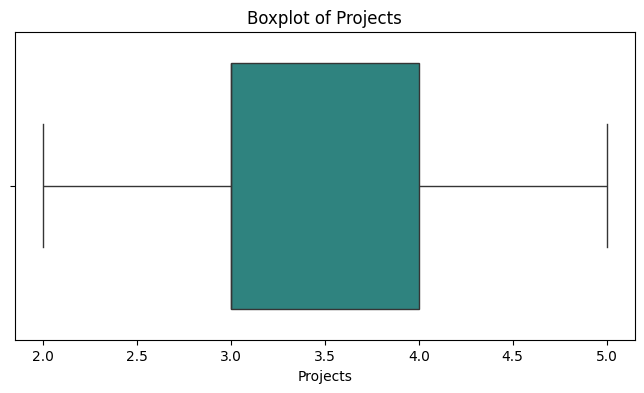

<ipython-input-141-7b177bf8f676>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


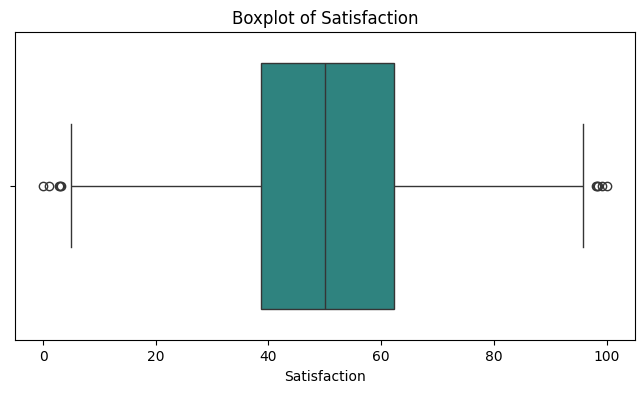

<ipython-input-141-7b177bf8f676>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


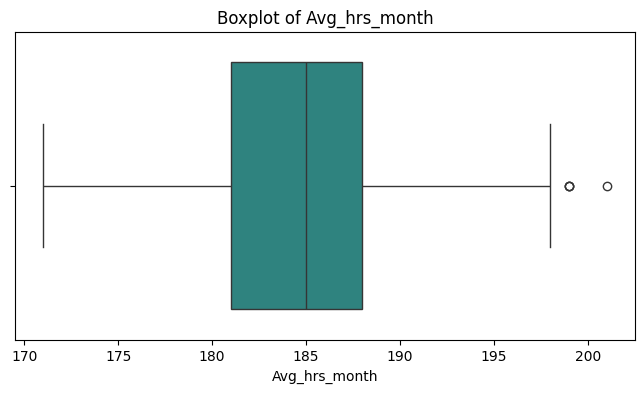

<ipython-input-141-7b177bf8f676>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


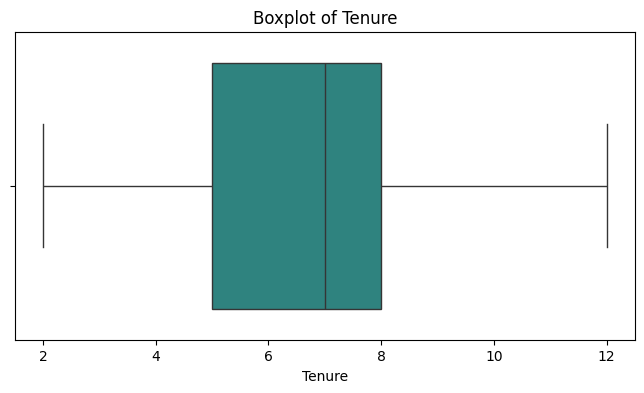

In [ ]:
# Boxplot to detect outliers in numerical features
for column in ['Review', 'Projects', 'Satisfaction', 'Avg_hrs_month','Tenure']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column], palette='viridis')
    plt.title(f'Boxplot of {column}')
    plt.show()


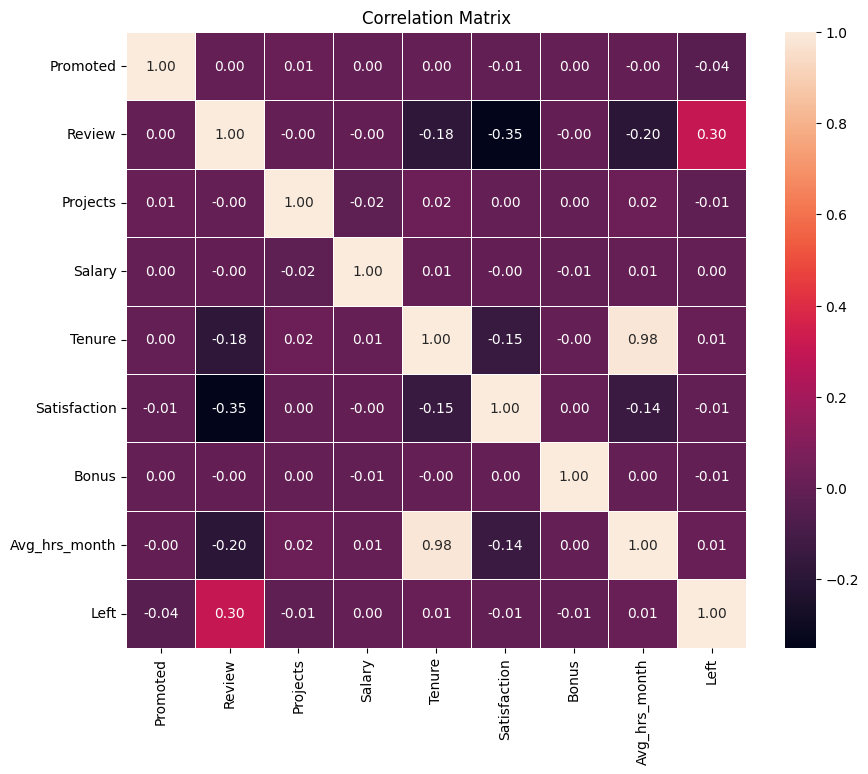

In [ ]:
# Heatmap
# Map 'Left' column values to numeric (1 for 'yes', 0 for 'no')
df['Left'] = df['Left'].map({'yes': 1, 'no': 0})
df['Salary'] = df['Salary'].map({'low': 1, 'medium': 2, 'high': 3})
# Filter out non-numeric columns (select only numeric columns)
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Create a heatmap with 'viridis' color map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5)

# Add a title to the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [ ]:
# Specify columns to drop
columns_to_drop = ['Promoted', 'Bonus', 'Salary', 'Projects']
# Drop columns that exist in the DataFrame
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis='columns')


In [ ]:
df.head(5)

,Department,Review,Tenure,Satisfaction,Avg_hrs_month,Left
0,operations,0.58,5,62.68,181,no
1,operations,0.75,6,44.37,183,no
2,support,0.72,6,44.68,184,no
3,logistics,0.68,8,44.01,189,no
4,sales,0.68,5,57.76,180,no


In [ ]:
# Removing outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR    # Lower bound
    upper_bound = Q3 + 1.5 * IQR    # Upper bound

    # Filter out rows with outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# List of columns to process
columns_to_clean = ['Review', 'Satisfaction','Avg_hrs_month']

# Remove outliers for each column
for column in columns_to_clean:
    df = remove_outliers_iqr(df, column)

# Display the cleaned DataFrame
print(df.head())


   Department  Review  Tenure  Satisfaction  Avg_hrs_month  Left
0  operations    0.58       5         62.68            181     0
1  operations    0.75       6         44.37            183     0
2     support    0.72       6         44.68            184     0
3   logistics    0.68       8         44.01            189     0
4       sales    0.68       5         57.76            180     0


<ipython-input-224-454627cf9ce2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


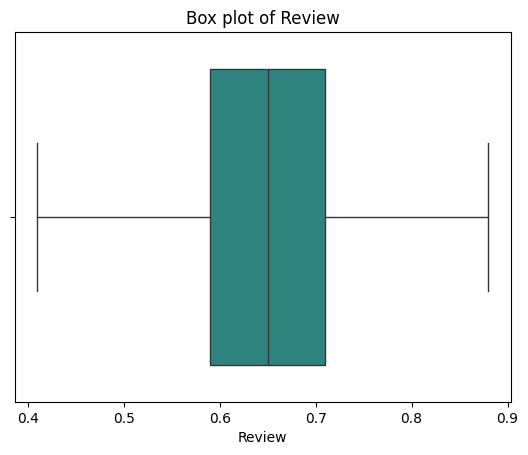

<ipython-input-224-454627cf9ce2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


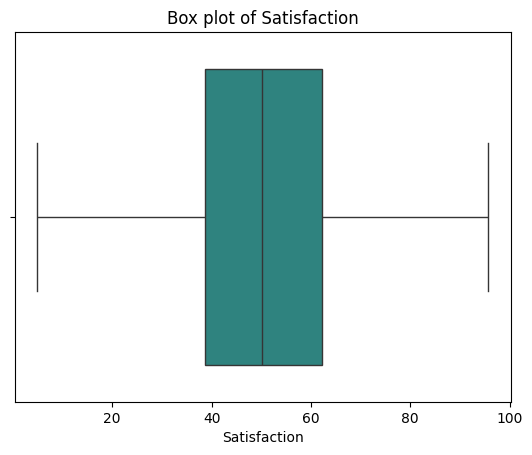

<ipython-input-224-454627cf9ce2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


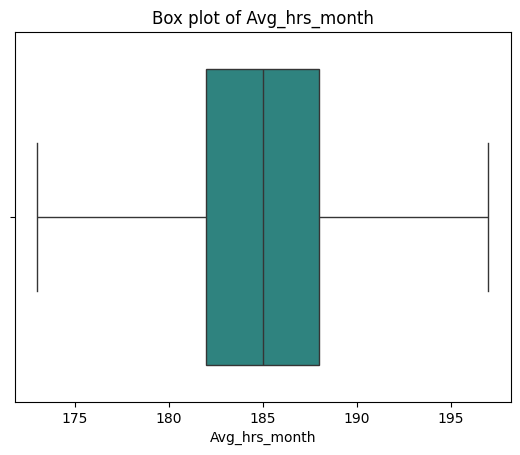

In [ ]:
# Attribute after remove outliers
columns_to_plot = ['Review','Satisfaction', 'Avg_hrs_month']

# Create box plots for the selected columns
for column in columns_to_plot:
    sns.boxplot(x=df[column], palette='viridis')
    plt.title(f'Box plot of {column}')
    plt.show()

In [ ]:
# Predictive Modeling: Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,f1_score, precision_score, recall_score,confusion_matrix

In [ ]:
# Convert categorical variables to dummy variables
df['Department'] = df['Department'].map({'operations': 1, 'support': 2, 'logistics': 3,'sales': 4, 'IT': 5, 'admin': 6,'engineering': 7, 'finance': 8, 'retail': 9, 'marketing': 10 })


In [ ]:
df.head(6)

,Department,Review,Tenure,Satisfaction,Avg_hrs_month,Left
0,1,0.58,5,62.68,181,0
1,1,0.75,6,44.37,183,0
2,2,0.72,6,44.68,184,0
3,3,0.68,8,44.01,189,0
4,4,0.68,5,57.76,180,0
5,5,0.68,5,56.53,179,0


In [ ]:
# Define features and target variable
X = df.drop(columns=['Left'])
y = df['Left']

In [ ]:
X.head(5)

,Department,Review,Tenure,Satisfaction,Avg_hrs_month
0,1,0.58,5,62.68,181
1,1,0.75,6,44.37,183
2,2,0.72,6,44.68,184
3,3,0.68,8,44.01,189
4,4,0.68,5,57.76,180


In [ ]:
y.head(5)

,Left
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

X_train.shape,y_train.shape

((8586, 5), (8586,))

In [ ]:
X_test.shape,y_test.shape

((948, 5), (948,))

In [ ]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)
# Fit the model to training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy Score: 0.7442348008385744

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.96      0.84       676
           1       0.69      0.22      0.34       278

    accuracy                           0.74       954
   macro avg       0.72      0.59      0.59       954
weighted avg       0.73      0.74      0.69       954


 Precision score is:
 0.6888888888888889

 Recall score is:
 0.22302158273381295

 F1:
 0.33695652173913043


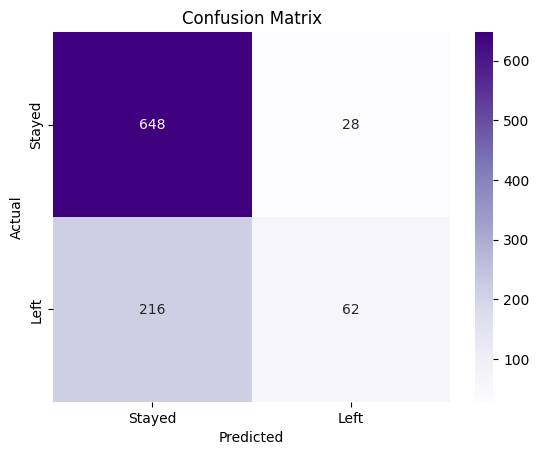

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\n Precision score is:\n",precision_score(y_test,y_pred))
print("\n Recall score is:\n",recall_score(y_test,y_pred))
print("\n F1:\n",f1_score(y_test,y_pred))
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()